In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
from pandas.plotting import scatter_matrix
%matplotlib inline 

import seaborn as sns 
sns.set(style='white',color_codes = True )
sns.set(font_scale = 1.5)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score


In [3]:
df_train = pd.read_csv('Train.csv')
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df_train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [5]:
df_train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [6]:
df_train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [7]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df_train = df_train.drop(['PassengerId','Name','Ticket','Cabin'], axis = 1)
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [9]:
df_train.groupby(['Pclass']).mean()

,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,0.629630,38.233441,0.416667,0.356481,84.154687
2,0.472826,29.877630,0.402174,0.380435,20.662183
3,0.242363,25.140620,0.615071,0.393075,13.675550


In [10]:
def age_approx(Age): #Ham trong python de chia chuong trinh thanh module nho hon

    if pd.isnull(Age):
        if Pclass == 1:
            return 37 
        elif Pclass == 2:
            return 29 
        else :
            return 24 
    else :
        return Age 

In [11]:
df_train['Age'] = df_train['Age'].apply(age_approx)

NameError: name 'Pclass' is not defined

In [18]:
df_train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [20]:
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [21]:
df_train.dropna(inplace = True)
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [22]:
df_train.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [23]:
dummied = pd.get_dummies(df_train, columns = ['Sex'])
dummied = pd.get_dummies(dummied, columns = ['Embarked'])

In [24]:
dummied.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


<AxesSubplot:>

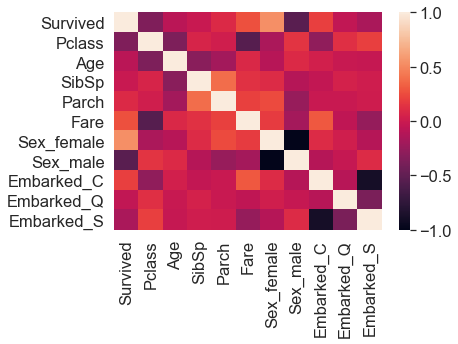

In [25]:
plt.figure(figsize = (6,4))
sns.heatmap(dummied.corr())

In [26]:
X = dummied.drop(['Survived','Fare'], axis = 1)
y = dummied['Survived']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 1 )

In [27]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(498, 9) (214, 9) (498,) (214,)


In [28]:
LogReg = LogisticRegression()

In [29]:
LogReg.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
y_pre = LogReg.predict(X_test)

In [32]:
metrics.confusion_matrix(y_test,y_pre)

array([[102,  24],
       [ 22,  66]], dtype=int64)

In [35]:
metrics.accuracy_score(y_test,y_pre)

0.7850467289719626

In [36]:
len(X_test) #Tra ve so luong ki tu cua chuoi dau vao ( so gia tri dau vao )

214

In [37]:
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82       126
           1       0.73      0.75      0.74        88

    accuracy                           0.79       214
   macro avg       0.78      0.78      0.78       214
weighted avg       0.79      0.79      0.79       214



In [38]:
LogReg.coef_

array([[-1.18238069, -0.04543134, -0.3608809 , -0.05208731,  1.29164774,
        -1.28899406,  0.29339588, -0.36833323,  0.07759103]])

In [39]:
LogReg.intercept_

array([3.97290409])

In [40]:
X.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [41]:
LogReg.predict_proba(X_test)

array([[0.03148646, 0.96851354],
       [0.55182926, 0.44817074],
       [0.88672522, 0.11327478],
       [0.10008625, 0.89991375],
       [0.17344677, 0.82655323],
       [0.87216729, 0.12783271],
       [0.31098653, 0.68901347],
       [0.23096274, 0.76903726],
       [0.87229721, 0.12770279],
       [0.66677007, 0.33322993],
       [0.82768746, 0.17231254],
       [0.61454456, 0.38545544],
       [0.83249377, 0.16750623],
       [0.89120896, 0.10879104],
       [0.75218809, 0.24781191],
       [0.93665728, 0.06334272],
       [0.9037361 , 0.0962639 ],
       [0.88208114, 0.11791886],
       [0.9035123 , 0.0964877 ],
       [0.94887067, 0.05112933],
       [0.67901089, 0.32098911],
       [0.20720548, 0.79279452],
       [0.93946615, 0.06053385],
       [0.9037361 , 0.0962639 ],
       [0.8447846 , 0.1552154 ],
       [0.25681117, 0.74318883],
       [0.86715022, 0.13284978],
       [0.61559497, 0.38440503],
       [0.31098653, 0.68901347],
       [0.65660049, 0.34339951],
       [0.